# MuSCAT2 transit analysis template

This template shows the steps for a basic transit analysis using WASP-43b light curve observed on 18.2.2018 as an example.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from muscat2ta.transitanalysis import TransitAnalysis

## Transit analysis initialisation

The transit analysis is done with a `TransitAnalysis` class that takes the root data directory (`droot`), target name (`target`), observing night (`night`), target ID (`tid`), and a list of comparison star IDs (`cids`). 

The data should be organized so that the photometry files are in `droot/target/night`.

In [3]:
droot = 'data'
target = 'wasp-43b'
night = '180218'

In [4]:
ta = TransitAnalysis(droot, target, night, tid = 0, cids = [1,2,3])

## Global optimisation

In [5]:
ta.optimize('linear', niter = 2000)

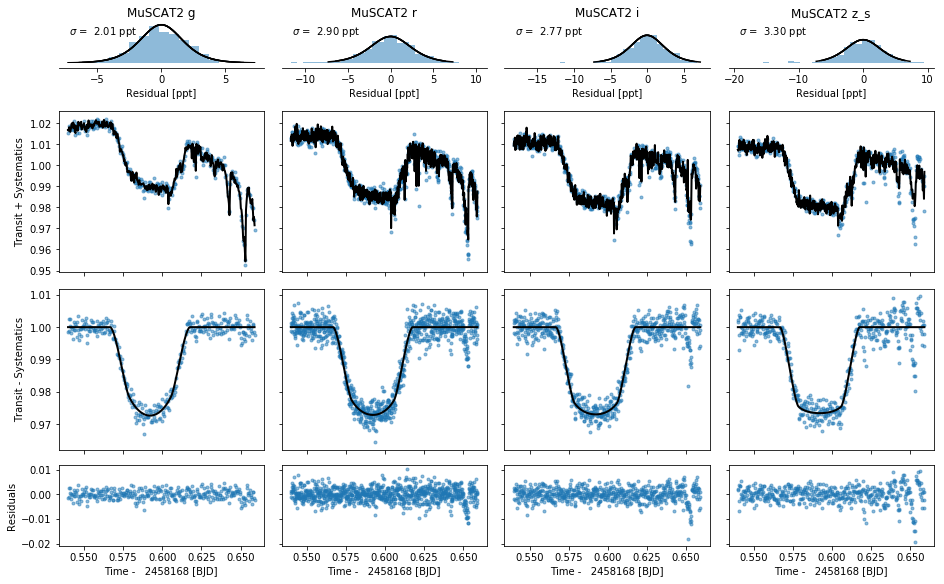

In [6]:
ta.plot_light_curve(method = 'de');

## MCMC Sampling

In [7]:
ta.sample('linear', niter = 1000, thin = 10, repeats = 3)

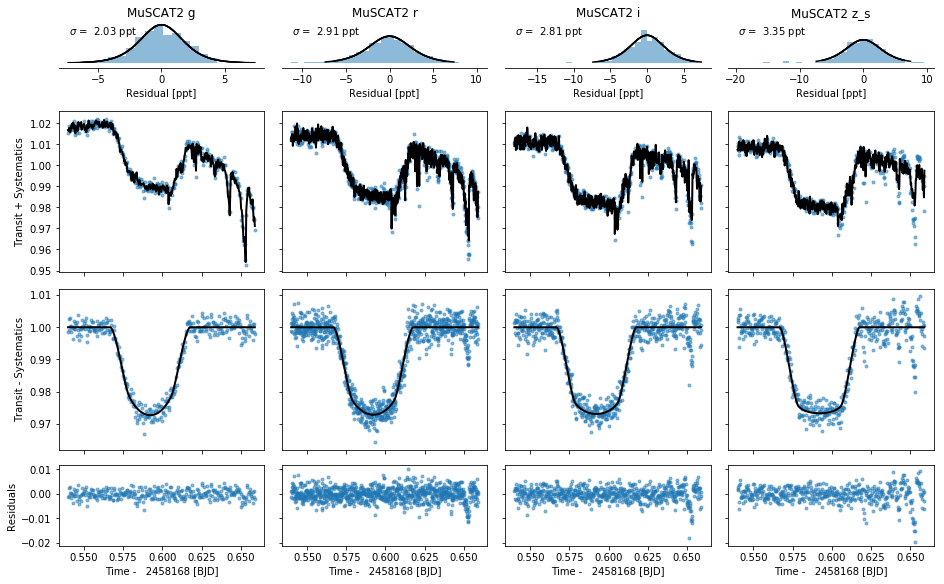

In [8]:
ta.plot_light_curve(method = 'mc', figsize=(13, 8));

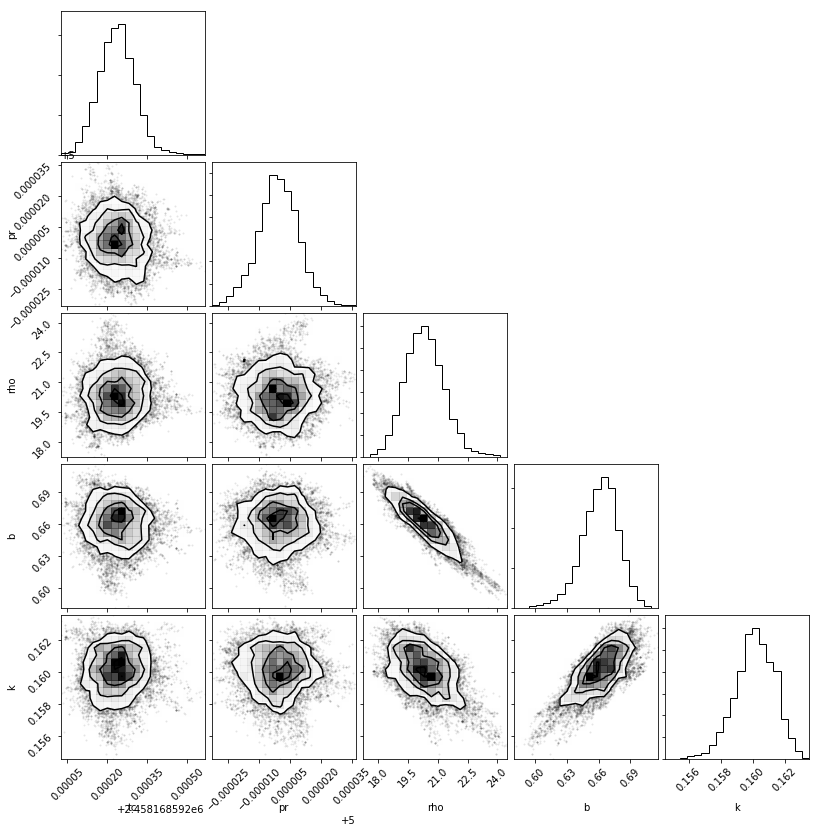

In [9]:
ta.plot_basic_posteriors('linear');

In [10]:
ta.save()

---

<center> &copy; 2019 Hannu Parviainen </center>